## 00 |

The objective of this **project** is to define the profile of the most profitable customers, based on a collection of **9.134** customer data, including demographics and buying behaviour.

In [1]:
# 📚 Basic libraries
import os # file managment
import pandas as pd # data manipulation
import numpy as np # numerical operations
import math # math in-build
import matplotlib.pyplot as plt # 2D visualization
import seaborn as sns # HD visualization
import warnings # warning messages managment

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LinearRegression # logistic model
from sklearn.linear_model import ElasticNet, Lasso, Ridge # Regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # model evaluation metrics

# ⚙️ Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') # ignore warnings

# 🔄 Functions
import sys # system path to our functions
sys.path.append("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data")

from easy.functions import open_data # quick data overview
from easy.functions import snake_columns # snake_case
from easy.functions import explore_data # checks for duplicates, NaN & empty spaces

In [2]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data/01_data/X_N.csv")
X_N = pd.read_csv(file_path)

## 04 | Data Processing

### Normalizing the Data

In [3]:
# We don't want to normalize the target
num2 = X_N.drop(columns=['total_claim_amount'])

# Selecting the scaler
transformer = StandardScaler().fit(num2)

n = transformer.transform(num2)
n = pd.DataFrame(n) # making it a panda dataframe
n['total_claim_amount'] = X_N['total_claim_amount'] # adding our target
n.columns = X_N.columns # keeping old columns
n.sample(3)

,Unnamed: 0,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
4442,-0.047217,-0.408822,-0.732899,-1.187838,-0.551841,-0.120468,2.027897,0.0,1.075304,-1.324482,-0.047217,-0.183346,-1.239617,2.871024,-1.399525,-0.754883,-0.42225,-0.822648,1921.248929
8864,1.629842,-0.408822,2.316897,0.666655,1.298568,1.562895,0.166682,0.0,-0.929969,-0.399979,1.629842,-0.633397,-1.239617,0.400531,1.678099,-0.181498,-0.42225,-0.822648,770.400000
7247,1.016589,-0.408822,0.791999,-0.260591,-0.551841,-1.242711,0.166682,0.0,1.075304,-0.168853,1.016589,0.513571,0.113259,0.080820,-1.200968,-1.184921,-0.42225,-0.404247,250.058657


### Visualizing the changes

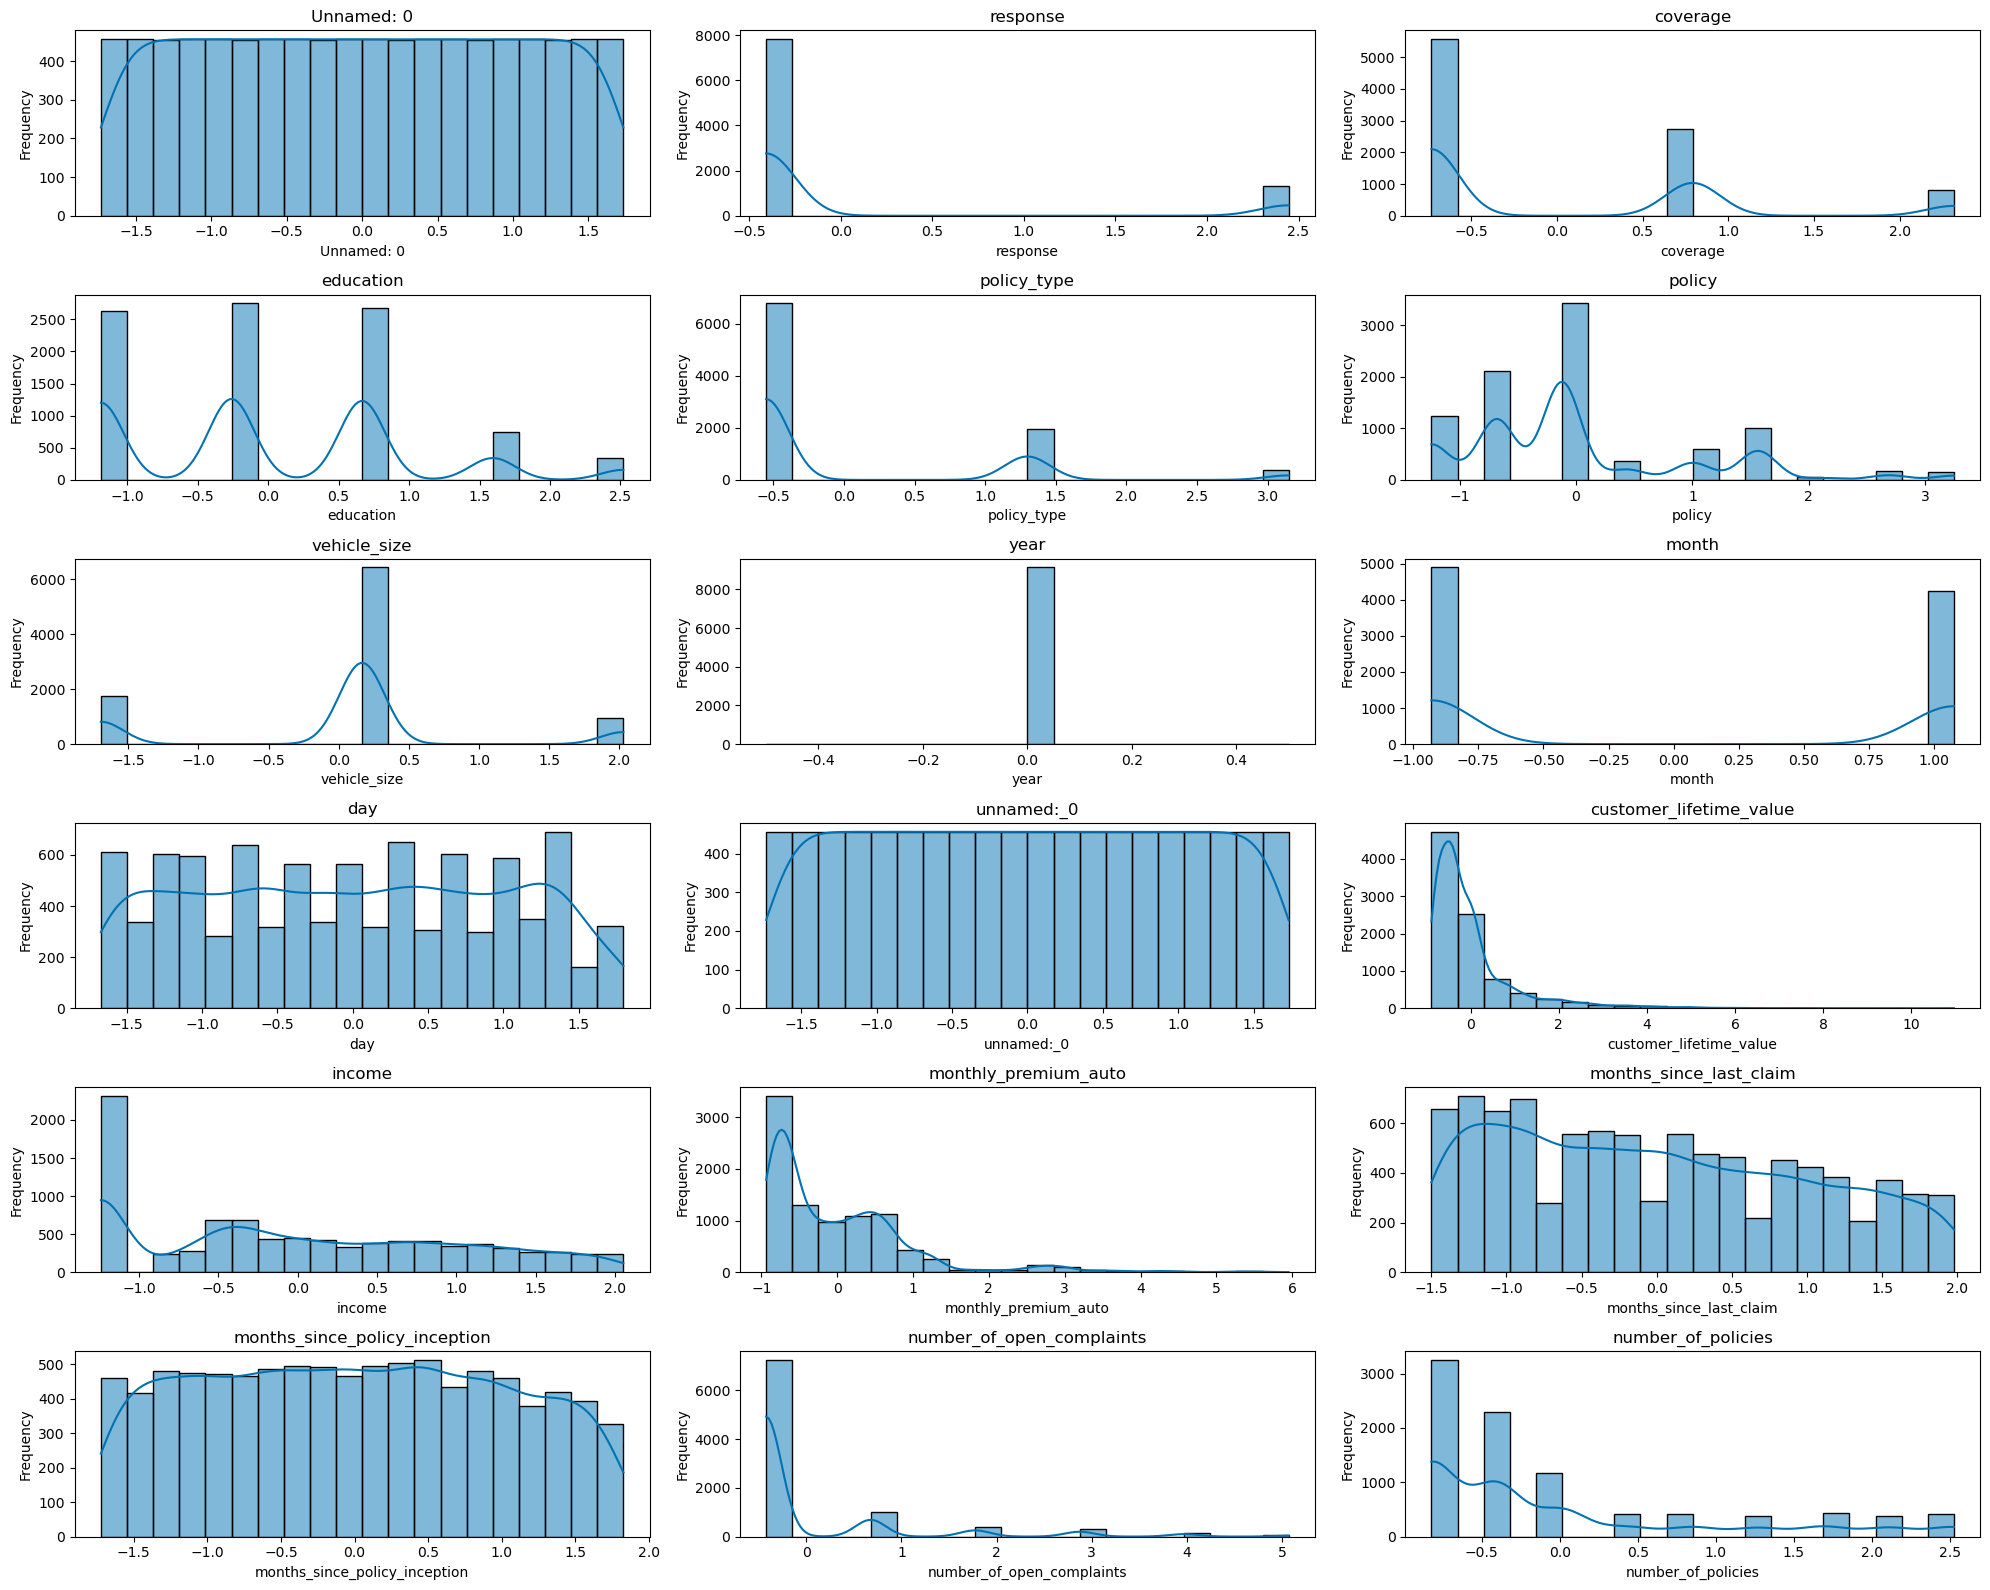

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 16))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(n.columns):
        break
    sns.histplot(data=n, x=n.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(n.columns[i])
    ax.set_xlabel(n.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Merging get_dummies Categoricals with Numericals 

In [5]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data/01_data/c_dumm.csv")
c_dumm = pd.read_csv(file_path)

In [6]:
# Merging the two dataframes
X_N = pd.concat([c_dumm, n], axis=1)
X_N.sample(3)

,Unnamed: 0,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,Unnamed: 0,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
6694,6694,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.806862,-0.408822,-0.732899,-0.260591,-0.551841,-1.242711,0.166682,0.0,-0.929969,1.795716,0.806862,2.362784,-1.239617,0.458660,0.387483,0.033522,1.774747,-0.404247,784.800000
1301,1301,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-1.238452,2.446054,-0.732899,-0.260591,-0.551841,-0.681590,0.166682,0.0,-0.929969,-1.440045,-1.238452,1.953063,-1.239617,-0.820183,-0.605299,-0.611536,-0.422250,-0.404247,312.000000
7302,7302,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1.037448,-0.408822,-0.732899,0.666655,-0.551841,-0.120468,0.166682,0.0,-0.929969,0.755650,1.037448,-0.433180,-1.239617,-0.762054,0.586039,0.427724,-0.422250,0.850957,216.196521


### X-Y Split

In [7]:
X_N.isnull().sum()

Unnamed: 0                        0
state_Arizona                     0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
employmentstatus_Disabled         0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_F                          0
gender_M                          0
location_code_Rural               0
location_code_Suburban            0
location_code_Urban               0
marital_status_Divorced           0
marital_status_Married            0
marital_status_Single             0
renew_offer_type_Offer1           0
renew_offer_type_Offer2           0
renew_offer_type_Offer3           0
renew_offer_type_Offer4           0
sales_channel_Agent               0
sales_channel_Branch              0
sales_channel_Call Center         0
sales_channel_Web                 0
vehicle_class_Four-Door Car 

In [8]:
# We need to be careful about when and how we do the split.
X_N.dropna(inplace=True) # Droping nulls, we got an error when we tried to model
Y = X_N['total_claim_amount']
X = X_N.drop(['total_claim_amount'], axis=1)

### Merging get_dummies Categoricals with Numericals 

In [9]:
# Merging the two dataframes
X_N = pd.concat([c_dumm, n], axis=1)
X_N.sample(3)

,Unnamed: 0,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,Unnamed: 0,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
5348,5348,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0.296387,-0.408822,0.791999,2.521148,-0.551841,-0.681590,0.166682,0.0,1.075304,0.524524,0.296387,-0.192104,0.612696,-0.297020,0.784596,-1.650797,-0.422250,0.432555,398.400000
8121,8121,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1.348057,-0.408822,0.791999,-1.187838,1.298568,1.001774,-1.694533,0.0,1.075304,-1.208919,1.348057,-0.160247,-0.715525,-0.035438,-0.605299,-1.292431,0.676249,0.432555,571.549745
2531,2531,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.771971,-0.408822,-0.732899,0.666655,-0.551841,-0.120468,0.166682,0.0,-0.929969,0.524524,-0.771971,-0.758249,-1.239617,-0.558602,-0.903134,0.463560,-0.422250,-0.822648,420.765993


### X-Y Split

In [10]:
X_N.isnull().sum()

Unnamed: 0                        0
state_Arizona                     0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
employmentstatus_Disabled         0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_F                          0
gender_M                          0
location_code_Rural               0
location_code_Suburban            0
location_code_Urban               0
marital_status_Divorced           0
marital_status_Married            0
marital_status_Single             0
renew_offer_type_Offer1           0
renew_offer_type_Offer2           0
renew_offer_type_Offer3           0
renew_offer_type_Offer4           0
sales_channel_Agent               0
sales_channel_Branch              0
sales_channel_Call Center         0
sales_channel_Web                 0
vehicle_class_Four-Door Car 

In [11]:
# We need to be careful about when and how we do the split.
X_N.dropna(inplace=True) # Droping nulls, we got an error when we tried to model
Y = X_N['total_claim_amount']
X = X_N.drop(['total_claim_amount'], axis=1)